Load pre-trained GloVe vectors

Tokenize each document

For each doc:

Remove stopwords

Lemmatize (optional)

Get vector for each word

Average them → document vector

Compute cosine similarity between document vectors

Plot a heatmap

0. Path to Glove data

In [6]:
glove_path = "D:/work/_Languages/Python/glove/glove.6B.300d.txt"

Old version of load_glove_vectors - loads ALL data

In [ ]:
import numpy as np

# Set path to GloVe file
#glove_path = "D:/data/glove.6B.300d.txt"

# Load GloVe embeddings
def load_glove_vectors(path):
    embeddings = {}
    with open(path, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vec = np.array(values[1:], dtype='float32')
            embeddings[word] = vec
    return embeddings

glove = load_glove_vectors(glove_path)
print("Loaded GloVe. Total words:", len(glove))


1. Imports and Setup

In [1]:
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# One-time downloads
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Stopword set
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tom_n\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tom_n\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tom_n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Sample Documents (longer texts)

In [2]:
docs = [
    """Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language. It focuses on how to program computers to process and analyze large amounts of natural language data.""",

    """Machine learning (ML) is a type of artificial intelligence that enables systems to learn and improve from experience without being explicitly programmed. ML algorithms build a mathematical model based on sample data, known as training data, to make predictions or decisions.""",

    """The Federal Reserve raised interest rates to combat inflation. Higher interest rates can slow borrowing, reduce consumer spending, and cool down an overheating economy. Investors reacted to the Fed's decisions with market volatility."""
]

labels = ["NLP", "Machine Learning", "Interest Rates"]


3. Build Vocabulary from Docs


In [3]:
# Collect all needed tokens from the documents
def extract_vocab(docs):
    vocab = set()
    for doc in docs:
        tokens = word_tokenize(doc.lower())
        tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
        vocab.update(tokens)
    return vocab

vocab = extract_vocab(docs)


4. Load Only Needed GloVe Vectors

In [7]:
# Load only vectors we need
def load_glove_subset(path, vocab, dim=300):
    glove = {}
    with open(path, encoding="utf8") as f:
        for line in f:
            word, *vec = line.split()
            if word in vocab:
                glove[word] = np.array(vec, dtype='float32')
            if len(glove) == len(vocab):
                break
    return glove

#glove_path = "D:/data/glove.6B.300d.txt"  # adjust if needed
glove = load_glove_subset(glove_path, vocab)
print(f"Loaded {len(glove)} word vectors out of {len(vocab)} requested.")


Loaded 65 word vectors out of 65 requested.


5. Convert Documents to Average Vectors

In [8]:
# Convert doc to averaged vector
def doc_to_vec(text, glove, dim=300):
    tokens = word_tokenize(text.lower())
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    vecs = [glove[w] for w in tokens if w in glove]
    if not vecs:
        return np.zeros(dim)
    return np.mean(vecs, axis=0)

doc_vectors = np.array([doc_to_vec(doc, glove) for doc in docs])


6. Cosine Similarity + Heatmap

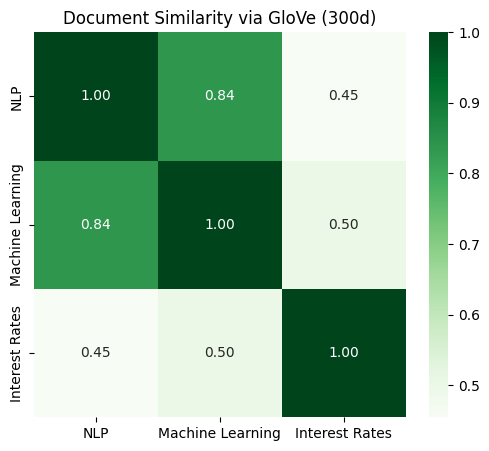

In [9]:
cos_sim = cosine_similarity(doc_vectors)

plt.figure(figsize=(6, 5))
sns.heatmap(cos_sim, annot=True, xticklabels=labels, yticklabels=labels, cmap="Greens", fmt=".2f")
plt.title("Document Similarity via GloVe (300d)")
plt.show()
